Загрузка датасета

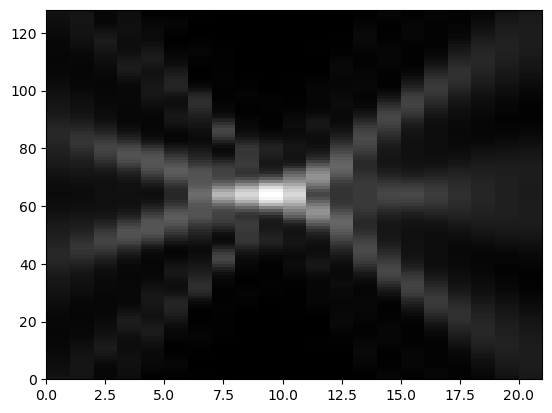

множество ответов лежит от -0.39224002516183426 до 0.4479084251025757


In [22]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# X = np.load("I_gauss_err_data.npy")
# Y = np.load("coefs_data.npy")

# X = np.load("dataset/I_spline_err_data.npy")
# Y = np.load("dataset/coefs_spline_err_data.npy")

X = np.load("dataset/I_pchip_3k_err_data.npy")
Y = np.load("dataset/coefs_pchip_3k_err_data.npy")

# X = np.load("dataset/I_zero_fix_1k_err_data.npy")
# Y = np.load("dataset/coefs_zero_fix_1k_err_data.npy")

# X = np.load("I_fix_1_1k_err_data.npy")
# Y = np.load("coefs_fix_1_1k_err_data.npy")

# X = np.load("dataset/I_fix_2_2k_err_data.npy")
# Y = np.load("dataset/coefs_fix_2_2k_err_data.npy")

frame = 90
%matplotlib inline
plt.pcolormesh(X[frame, :, :].T, cmap="Greys_r")
plt.show()
print(f"множество ответов лежит от {np.min(Y)} до {np.max(Y)}")

Предобработка синтетических данных для обучения

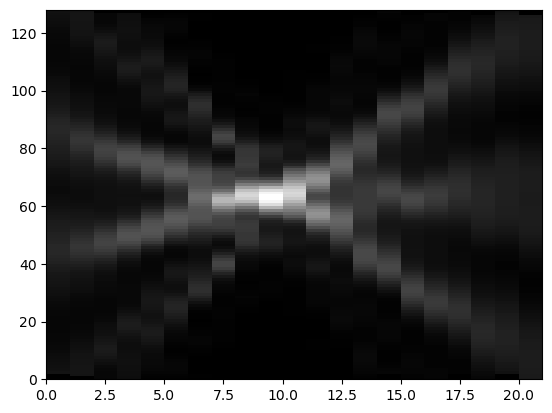

In [23]:
from scipy.interpolate import interp1d

def shift_horizontal_slices_non_integer(frame_stack, shift_range):
  """
  Randomly shifts horizontal slices (21 pixels) in the frame stack,
  allowing non-integer shifts using interpolation.

  Args:
    frame_stack: NumPy array of shape (1000, 21, 128) - the frame stack.
    shift_range: Maximum number of pixels for the shift. For example,
                 if shift_range = 5.0, each slice will be shifted randomly
                 by a value from -5.0 to 5.0 pixels.

  Returns:
    NumPy array of shape (1000, 21, 128) - the frame stack with shifted slices.
  """

  num_frames = frame_stack.shape[0]
  num_slices = frame_stack.shape[1]
  height = frame_stack.shape[2]

  shifted_stack = np.zeros_like(frame_stack, dtype=np.float64)  # Create an empty array for the result, float64 for interpolation

  x = np.arange(height)  # Original pixel coordinates

  for i in range(num_frames):
    for j in range(num_slices):
      shift = np.random.uniform(-shift_range, shift_range)  # Generate a random non-integer shift
      shifted_coordinates = x + shift

      # Create an interpolation function
      f = interp1d(x, frame_stack[i, j, :], kind='linear', bounds_error=False, fill_value=0)  # Linear interpolation

      # Apply interpolation to the shifted coordinates
      shifted_stack[i, j, :] = f(shifted_coordinates)

  return shifted_stack.astype(frame_stack.dtype) # Return to the original data type


X = shift_horizontal_slices_non_integer(X, 2)
plt.pcolormesh(X[frame, :, :].T, cmap="Greys_r")

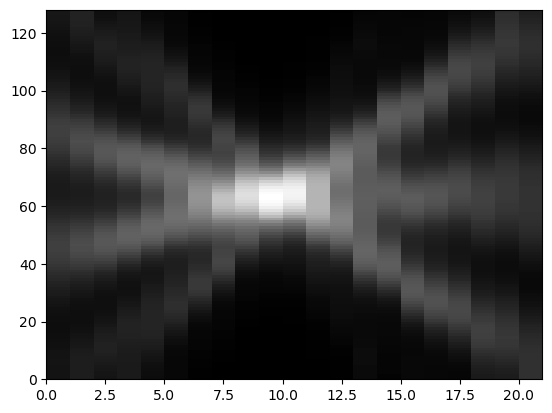

(3000, 21, 128) (3000, 10)
Min, Max of Training:  6305.653772455436 2719969066.4154987


In [24]:
# X_max_axis = np.max(X, axis=2)
# for i in range(1000):
#     X[i] = (X[i].T / X_max_axis[i]).T

# X = X**1.4

# X = np.log(1+X)

# for i in range(len(X)):
#     X[i] = np.gradient(X[i], axis=0)


from scipy.ndimage import gaussian_filter1d

for i in range(len(X)):
    X[i] = gaussian_filter1d(X[i], 5)


# for i in range(len(Y)):
#     Y[i] -= Y[i, -1]

# for i in range(len(Y)):
#     Y[i] = np.gradient(Y[i])

plt.pcolormesh(X[frame, :, :].T/np.max(X[frame, :, :].T), cmap="Greys_r")
plt.show()

print(X.shape, Y.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42  # test_size - доля тестовой выборки (20% в данном случае)
)

min_training_data = X_train.min()
max_training_data = X_train.max()

print("Min, Max of Training: ", min_training_data, max_training_data)

# data type: images— 4D tensors of shape (samples, height, width, channels) or (samples, channels, height, width)
#            could also be Timeseries data or sequence data— 3D tensors of shape (samples, timesteps, features)
#            right now our data is (samples, features (256), timesteps (65))
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_train = X_train.astype('float32')
X_train = (X_train - min_training_data) / (max_training_data - min_training_data)

X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
X_test = X_test.astype('float32')
X_test = (X_test - min_training_data) / (max_training_data - min_training_data)

Epoch 1/100
38/38 [==============================] - 1s 11ms/step - loss: 0.0750 - accuracy: 0.2071 - val_loss: 0.0714 - val_accuracy: 0.2683
Epoch 2/100
38/38 [==============================] - 0s 8ms/step - loss: 0.0662 - accuracy: 0.3179 - val_loss: 0.0653 - val_accuracy: 0.3467
Epoch 3/100
38/38 [==============================] - 0s 8ms/step - loss: 0.0608 - accuracy: 0.3925 - val_loss: 0.0601 - val_accuracy: 0.4150
Epoch 4/100
38/38 [==============================] - 0s 8ms/step - loss: 0.0584 - accuracy: 0.4404 - val_loss: 0.0594 - val_accuracy: 0.4400
Epoch 5/100
38/38 [==============================] - 0s 9ms/step - loss: 0.0556 - accuracy: 0.4679 - val_loss: 0.0569 - val_accuracy: 0.4867
Epoch 6/100
38/38 [==============================] - 0s 7ms/step - loss: 0.0541 - accuracy: 0.4854 - val_loss: 0.0549 - val_accuracy: 0.5067
Epoch 7/100
38/38 [==============================] - 0s 7ms/step - loss: 0.0523 - accuracy: 0.5142 - val_loss: 0.0554 - val_accuracy: 0.4950
Epoch 8/100


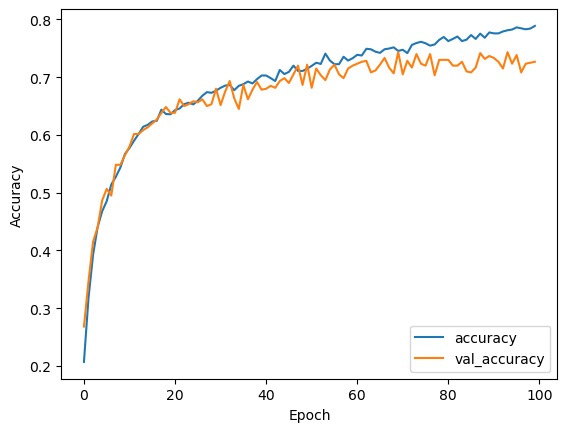

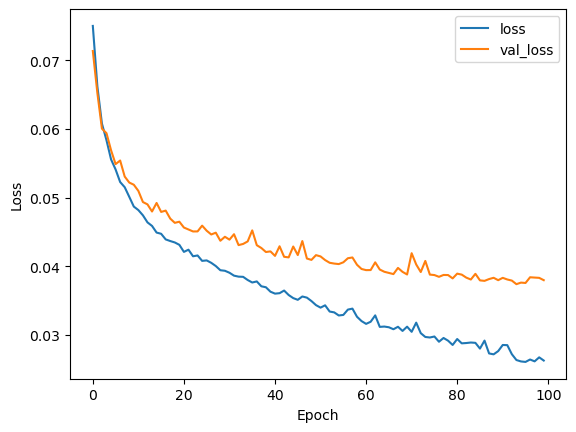

In [25]:
from tensorflow.keras import models, layers, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# def get_model(input_shape):
#     model = Sequential([
#         layers.InputLayer(input_shape=(21, 128, 1)),

#         layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
#         layers.MaxPooling2D((2, 2)),

#         layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
#         layers.MaxPooling2D((2, 2)),

#         layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
#         layers.MaxPooling2D((2, 2)),

#         layers.Flatten(),
#         layers.Dense(256, activation='relu'),
#         layers.Dense(4)  # Output layer with number of coefficients
#     ])
#     return model

def get_model(input_shape, output_shape):
    model = Sequential([
        layers.InputLayer(input_shape=input_shape),  # Важно использовать input_shape здесь

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),  # 21 -> 10  , 128 -> 64

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),  # 10 -> 5 , 64 -> 32

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), padding='same'),  # 5 -> 3 (или 2 если padding='valid'), 32 -> 16

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(output_shape)  # Output layer with number of coefficients
    ])
    return model

# Создание модели
model = get_model(input_shape=(X_train.shape[1], X_train.shape[2], 1), output_shape=y_train.shape[1])

# Компиляция модели
# optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4)
optimizer = Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer , loss='mae', metrics=["accuracy"])


# # Аугментация данных
# datagen = ImageDataGenerator(
#     rotation_range=1,
# )

# # Применяем аугментацию к обучающим данным
# datagen.fit(X_train)


# Обучение модели
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

# Оценка модели
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Графики обучения (по желанию)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

Prediction: [-0.11580476  0.11236186 -0.01238002  0.1111533  -0.02355086 -0.12567505
 -0.10648795  0.08984497 -0.00337924 -0.03349254]
True value: [-0.16694053  0.05433602 -0.06626238  0.05705987 -0.07632592 -0.18048821
 -0.16275424  0.00480849  0.02597225 -0.09043166]


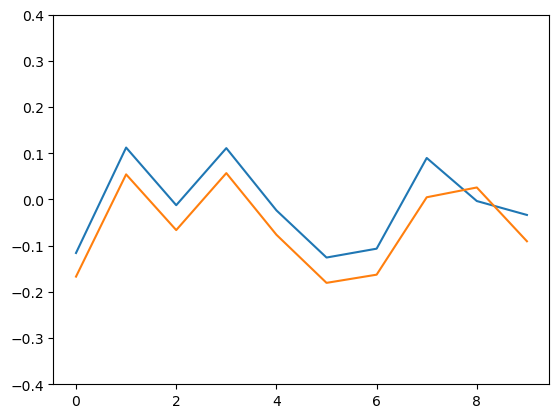

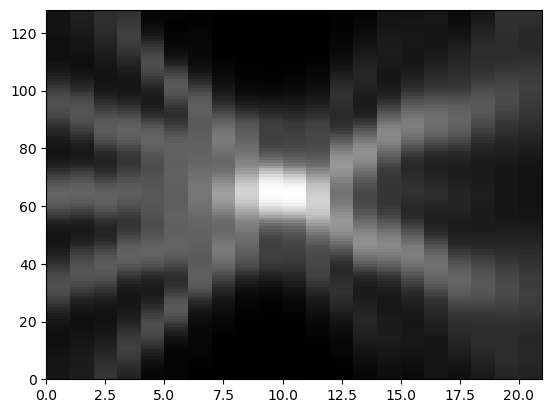

In [26]:
frame = 11
sample = X_test[frame].reshape((1, 21, 128, 1))  # Добавление размерности для пакета (batch size)
prediction = model.predict(sample)
print("Prediction:", np.array(prediction[0]))
print("True value:", np.array(y_test[frame]))
# plt.plot(abs(prediction[0]-y_test[frame]))
plt.plot(prediction[0])
plt.plot(y_test[frame])
plt.ylim(-0.4, 0.4),
plt.show()
# plt.pcolormesh(X_test[frame, :, :, 0], cmap="Greys_r")
plt.pcolormesh(sample[0, :, :, 0].T, cmap="Greys_r")

In [27]:
def nearest_elem_index(elem, data):
    idx = np.where(data == data.flat[np.abs(data -  elem).argmin()])[0][0]
    print(f"nearest elem is {data[idx]}")
    return int(idx)

def read_res(folder, model_name=''):
    x = np.load(f"{folder}/{model_name}/x.npy")
    y = np.load(f"{folder}/{model_name}/y.npy")
    data_interp = np.load(f"{folder}/{model_name}/data_interp.npy")
    data_deconv = np.load(f"{folder}/{model_name}/data_deconv.npy")
    
    return x, y, data_interp, data_deconv

x_ftian, y_ftian, data_interp, data_deconv = read_res("../FRAMES_PREPROCESSING/FTIAN_2/data_cache")

nearest elem is -3.210345506585933
nearest elem is 3.194346575525504
nearest elem is -12.995291743145074


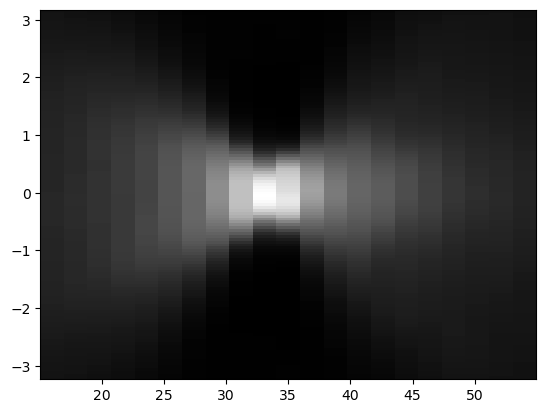

In [30]:
x_level = -13

Y_POS = 3.2

data_deconv_tr = np.transpose(data_deconv, (2, 1, 0))
y_pix_l = nearest_elem_index(-Y_POS, y_ftian)
y_pix_r = nearest_elem_index(Y_POS, y_ftian)
data_deconv_cutted = data_deconv_tr[nearest_elem_index(x_level, x_ftian)][y_pix_l:y_pix_r].copy()
y_ftian_cutted = y_ftian[y_pix_l:y_pix_r].copy()

from scipy.interpolate import interp1d

xnew = np.linspace(y_ftian_cutted[0], y_ftian_cutted[-1], 128)

data_calc = np.empty(shape=(21, 128))

for i, dd in enumerate(data_deconv_cutted.T):
    f = interp1d(y_ftian_cutted, dd, "cubic")
    data_calc[i] = f(xnew)

data_calc /= np.max(data_calc)

plt.pcolormesh(np.linspace(16, 54, 21), xnew, data_calc.T, cmap="Greys_r")

Prediction: array([-0.12123197, -0.13951704, -0.15029344, -0.16840576, -0.13425624,
       -0.14451087, -0.10306165, -0.03294156,  0.04710029,  0.16337004],
      dtype=float32)


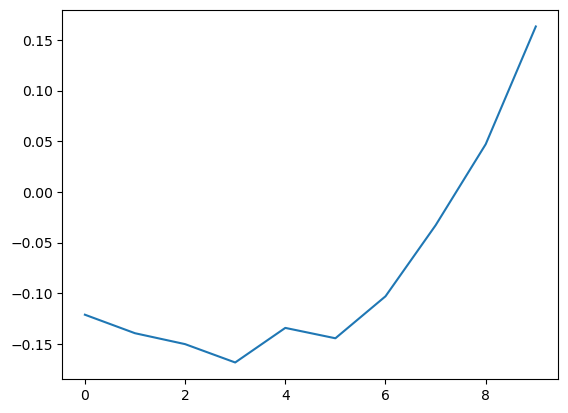

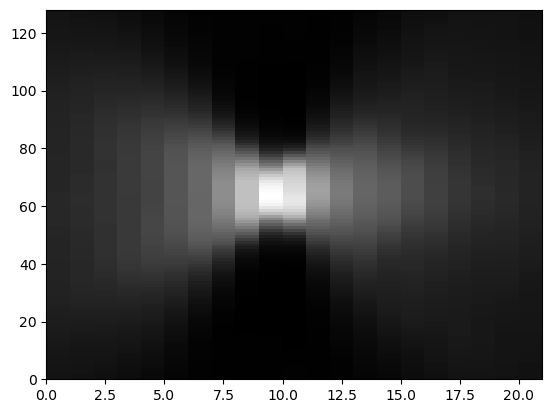

In [31]:
data_calc = data_calc.reshape((data_calc.shape[0], data_calc.shape[1], 1))

sample = data_calc.reshape((1, 21, 128, 1))  # Добавление размерности для пакета (batch size)

prediction = model.predict(sample)
print("Prediction:", repr(np.array(prediction[0])))
# print("True value:", np.array(y_test[frame]))
# plt.plot(abs(prediction[0]-y_test[frame]))
plt.plot(prediction[0])
# plt.plot(y_test[frame])
# plt.ylim(-0.4, 0.4),
plt.show()
# plt.pcolormesh(X_test[frame, :, :, 0], cmap="Greys_r")
plt.pcolormesh(sample[0,:,:,0].T, cmap="Greys_r")

In [ ]:
%matplotlib tk
plt.plot(sample[0, 6, :, 0])
plt.grid()